In [1]:
from pprint import pprint
from list_2.models import Edge
from models import Vertex
from models import Graph
import random
import itertools
from IPython.display import Image

import pandas as pd

In [2]:
# initialize vertices
vertex_0 = Vertex(id=0)
vertex_null = Vertex(id=-1)
vertices = [Vertex(id=1), Vertex(id=2), Vertex(id=3), Vertex(id=4), Vertex(id=5)]

In [3]:
# initialize graph
graph = Graph()

In [4]:
# add vertex to graph
graph.add_vertex(vertex_0)
graph.add_vertices_from_list(vertices)

In [6]:
# check __contains__ method
print(vertex_0 in graph)
print(vertex_null in graph)

True
False


In [7]:
pprint(f"vertices: {graph.get_vertices()}")

('vertices: [Vertex(id=0), Vertex(id=1), Vertex(id=2), Vertex(id=3), '
 'Vertex(id=4), Vertex(id=5)]')


In [8]:
# initialize edges
subsets = list(itertools.combinations(vertices, 2))
random.shuffle(subsets)
edges = []
for i in range(10):
    from_vert, to_vert = subsets[i]
    edge = Edge(from_vert=from_vert, to_vert=to_vert, weight=random.randint(1, 10))
    edges.append(edge)

In [9]:
# append edges
graph.add_edges_from_list(edges)

pprint(f"edges {graph.get_edges()}")

('edges [Edge(from_vert=Vertex(id=3), to_vert=Vertex(id=4), weight=10), '
 'Edge(from_vert=Vertex(id=1), to_vert=Vertex(id=5), weight=6), '
 'Edge(from_vert=Vertex(id=1), to_vert=Vertex(id=2), weight=8), '
 'Edge(from_vert=Vertex(id=4), to_vert=Vertex(id=5), weight=8), '
 'Edge(from_vert=Vertex(id=2), to_vert=Vertex(id=4), weight=6), '
 'Edge(from_vert=Vertex(id=1), to_vert=Vertex(id=4), weight=5), '
 'Edge(from_vert=Vertex(id=2), to_vert=Vertex(id=5), weight=7), '
 'Edge(from_vert=Vertex(id=2), to_vert=Vertex(id=3), weight=5), '
 'Edge(from_vert=Vertex(id=1), to_vert=Vertex(id=3), weight=10), '
 'Edge(from_vert=Vertex(id=3), to_vert=Vertex(id=5), weight=6)]')


In [10]:
# save graph
graph.save_graph(path="data/test_graph.txt", graph_name="test")

Checking the implementation basing on Assignment 1 network

In [12]:
graph= Graph()

df = pd.read_csv("../list_1/data/network.csv")

names = set(df['Unnamed: 0']) | set(df['Unnamed: 1'])

# create vertex instances
to_vertex = lambda x: Vertex(id=x)
df = df.apply({"Unnamed: 0": to_vertex, "Unnamed: 1": to_vertex})

# add verices
graph.add_vertices_from_list([to_vertex(name) for name in names])

# add edges
for row in df.values:
    graph.add_edge(from_vert=row[0], to_vert=row[1])

graph.save_graph(path="data/alice_network.txt", graph_name="alice_network")

to visualise graph in a dot format I will use OPEN SOURCE software:
[visualisation tool](https://dreampuf.github.io/GraphvizOnline/#graph%20alice_network%20%7B%0D%0AAlice%20--%20Bob%20%5Bweight%3D1%5D%0D%0ACarl%20--%20Alice%20%5Bweight%3D1%5D%0D%0AAlice%20--%20David%20%5Bweight%3D1%5D%0D%0AAlice%20--%20Ernst%20%5Bweight%3D1%5D%0D%0AAlice%20--%20Frank%20%5Bweight%3D1%5D%0D%0ABob%20--%20Gail%20%5Bweight%3D1%5D%0D%0AGail%20--%20Harry%20%5Bweight%3D1%5D%0D%0AHarry%20--%20Jen%20%5Bweight%3D1%5D%0D%0AJen%20--%20Gail%20%5Bweight%3D1%5D%0D%0AHarry%20--%20Irene%20%5Bweight%3D1%5D%0D%0AIrene%20--%20Gail%20%5Bweight%3D1%5D%0D%0AIrene%20--%20Jen%20%5Bweight%3D1%5D%0D%0AErnst%20--%20Frank%20%5Bweight%3D1%5D%0D%0ADavid%20--%20Carl%20%5Bweight%3D1%5D%0D%0ACarl%20--%20Frank%20%5Bweight%3D1%5D%0D%0A%7D)


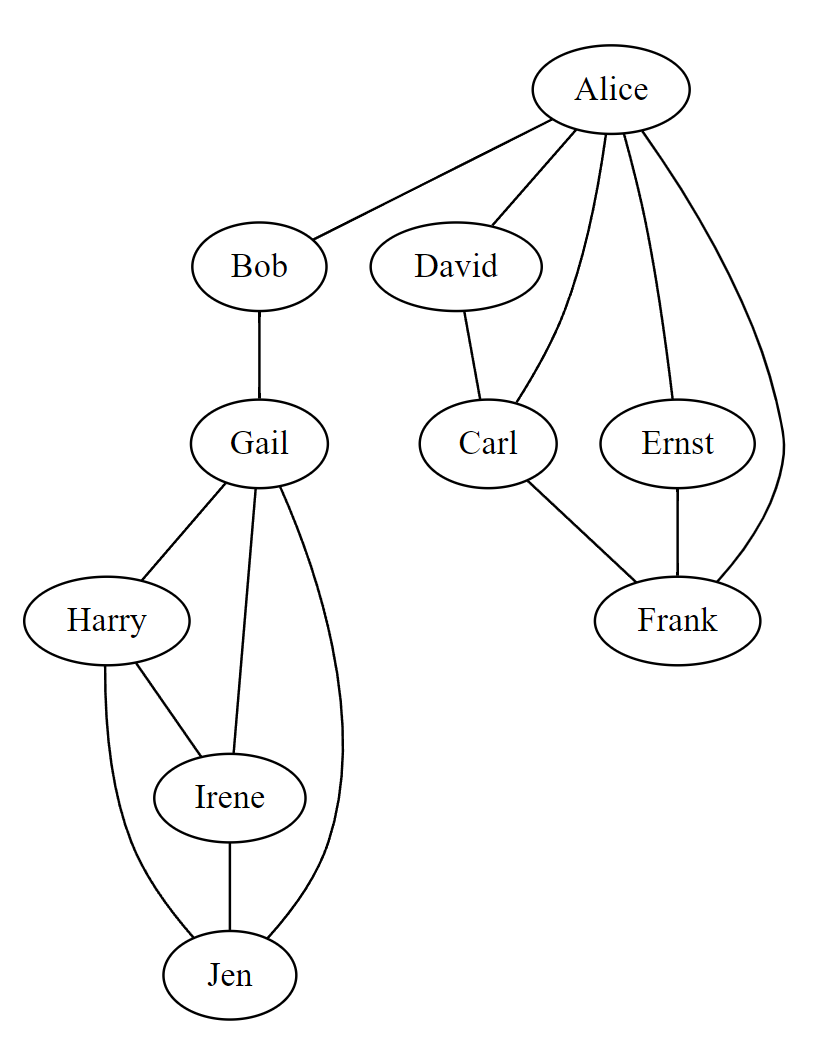

In [13]:
Image('data/dot_graphic.png')

As we can see, it looks just the same as Gephi result from _Assignment 1_

## 2. Add the following method to the above implementation:
## * getShortestPaths(fromVert) calculates shortest paths in the graph
## from the given vertex to all other vertices.
## Use the already known social network to check how the method works.

I'm going to use social network from _Assignment 1_.

Ex. Alice, Ernst

In [14]:
vert = [it for it in graph.get_vertices() if it.id == 'Alice'][0]
graph.get_shortest_paths(vert)

{'Bob': 1,
 'Carl': 1,
 'David': 1,
 'Ernst': 1,
 'Frank': 1,
 'Gail': 2,
 'Harry': 3,
 'Jen': 3,
 'Irene': 3}

In [15]:
vert = [it for it in graph.get_vertices() if it.id == 'Ernst'][0]
graph.get_shortest_paths(vert)

{'Alice': 1,
 'Frank': 1,
 'Bob': 2,
 'Carl': 2,
 'David': 2,
 'Gail': 3,
 'Harry': 4,
 'Jen': 4,
 'Irene': 4}

works well